# COVID-19 History in Georgia Visualization

*Data from http://covidtracking.com*

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import scipy

url = "https://covidtracking.com/data/download/georgia-history.csv"

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

After reading the data in, let's do some basic cleansing of the data.

In [2]:
# Sort the data by date
df = data.sort_values(by=['date'], ascending=True)

# Drop columns which don't interest us.
df.drop(columns=["state","dataQualityGrade"], inplace=True)

# Ensure that the date is unique
df["date"].is_unique

True

Now we'll set the index of the data frame to the date.

In [3]:
df

,date,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
278,2020-03-04,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
277,2020-03-05,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
276,2020-03-06,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
275,2020-03-07,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
274,2020-03-08,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-03,9648.0,8879.0,81,769.0,35571.0,35571.0,2691.0,245,6599.0,...,4396665,33701,367023.0,NaN,NaN,NaN,NaN,0,4396665,33701
3,2020-12-04,9725.0,8922.0,77,803.0,35783.0,35783.0,2749.0,212,6642.0,...,4435020,38355,368962.0,NaN,NaN,NaN,NaN,0,4435020,38355
2,2020-12-05,9793.0,8969.0,68,824.0,36001.0,36001.0,2753.0,218,6671.0,...,4466200,31180,369581.0,NaN,NaN,NaN,NaN,0,4466200,31180
1,2020-12-06,9806.0,8971.0,13,835.0,36039.0,36039.0,2829.0,38,6676.0,...,4476052,9852,369773.0,NaN,NaN,NaN,NaN,0,4476052,9852


<AxesSubplot:xlabel='date'>

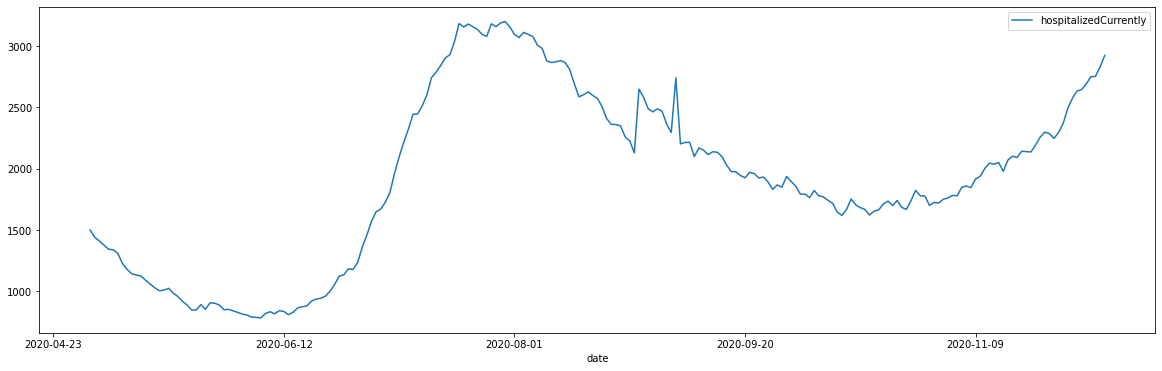

In [4]:
df.plot(x='date', y='hospitalizedCurrently', figsize=(20,6))

The above data is taken from [https://covidtracking.com/data/state/georgia](https://covidtracking.com/data/state/georgia)

<AxesSubplot:xlabel='date'>

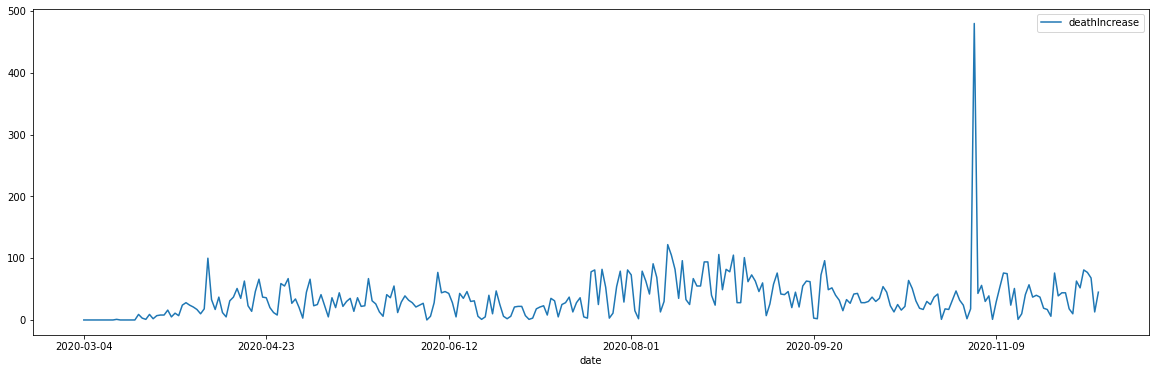

In [5]:
deaths = df.loc[:,('date', 'deathIncrease')]

deaths.sort_values(by=['date'], ascending=True, inplace=True)

deaths.plot(x='date', y='deathIncrease', figsize=(20,6))

OK - There's clearly an outlier there. Let's filter out values by quintile:

In [6]:
q = deaths["deathIncrease"].quantile(.999)
q

380.4760000000132

<AxesSubplot:xlabel='date'>

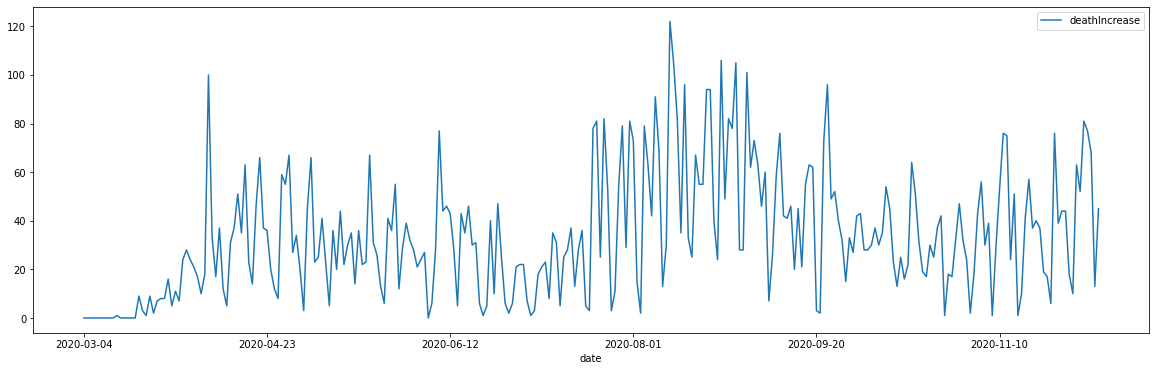

In [7]:
deaths_filtered = deaths[deaths["deathIncrease"] < q]
deaths_filtered.plot(x='date', y='deathIncrease', figsize=(20,6))

<AxesSubplot:>

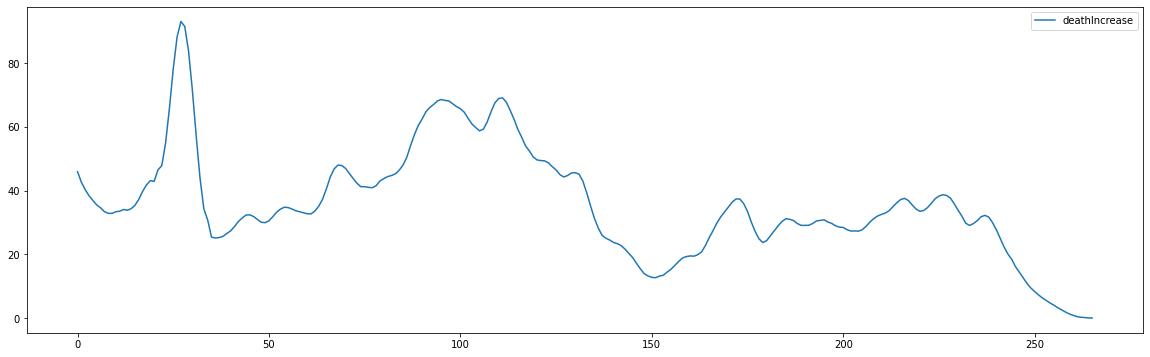

In [10]:
deaths.rolling(14,win_type='hamming').mean().plot(figsize=(20,6))